In [1]:
import pandas as pd 
import re 
import string 
import nltk
import simplemma
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df.drop('Unnamed: 0', inplace=True, axis=1)

In [4]:
df

,restaurant_name,rating,quote,review
0,Maison Bretonne,1,Awful,Delusione per la qualità degli ingredienti. Se...
1,Maison Bretonne,1,Awful,"galettes veramente cattive, bruciate e dure. p..."
2,Maison Bretonne,3,Average,Mi aspettavo qualcosa di meglio. La qualità er...
3,Maison Bretonne,3,Good,Gallette molto buone . Cidro bretone e buon vi...
4,Komenn Thai,3,Average,"Serata un po' così così, Non sono stati organi..."
...,...,...,...,...
80140,Hachi Ristorante Giapponese,5,Ottimo,"Ottimo Giapponese. Personale cortese, cibo ott..."
80141,Hachi Ristorante Giapponese,5,Bikkuri che passione!,"Abbiamo provato la formula All you can eat, e ..."
80142,Hachi Ristorante Giapponese,5,Perfetto Sushi!,Chi si aspetta in italia ad un sushi perfetto?...
80143,Hachi Ristorante Giapponese,5,Sushi!! incredibile,Non credo che un ristorante di Sushi sarebbe b...


In [5]:
stopwords = nltk.corpus.stopwords.words('italian')

In [6]:
corpus = []
for i in range(0, len(df)): #as the data as 1000 data points
    if(i%2500==0):
        print(i)
    review = re.sub(r'[^\w\s]', ' ', str(df['review'][i]))
    review = re.sub(r'\s{2,}', ' ', review)
    review = review.lower()
    review = review.split()
    review = [simplemma.lemmatize(word, lang='it') for word in review if not word in set(stopwords)]
    review = ' '.join(review)
    corpus.append(review)

0
2500
5000
7500
10000
12500
15000
17500
20000
22500
25000
27500
30000
32500
35000
37500
40000
42500
45000
47500
50000
52500
55000
57500
60000
62500
65000
67500
70000
72500
75000
77500
80000


In [7]:
df.loc[df["rating"] < 4, "rating"] = 0
df.loc[df["rating"] >= 4, "rating"] = 1

In [8]:
df = df.astype({'rating':'int'})

In [9]:
df

,restaurant_name,rating,quote,review
0,Maison Bretonne,0,Awful,Delusione per la qualità degli ingredienti. Se...
1,Maison Bretonne,0,Awful,"galettes veramente cattive, bruciate e dure. p..."
2,Maison Bretonne,0,Average,Mi aspettavo qualcosa di meglio. La qualità er...
3,Maison Bretonne,0,Good,Gallette molto buone . Cidro bretone e buon vi...
4,Komenn Thai,0,Average,"Serata un po' così così, Non sono stati organi..."
...,...,...,...,...
80140,Hachi Ristorante Giapponese,1,Ottimo,"Ottimo Giapponese. Personale cortese, cibo ott..."
80141,Hachi Ristorante Giapponese,1,Bikkuri che passione!,"Abbiamo provato la formula All you can eat, e ..."
80142,Hachi Ristorante Giapponese,1,Perfetto Sushi!,Chi si aspetta in italia ad un sushi perfetto?...
80143,Hachi Ristorante Giapponese,1,Sushi!! incredibile,Non credo che un ristorante di Sushi sarebbe b...


In [10]:
cv = CountVectorizer(max_features = 2000)
#the X and y
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:, 1].values
#X- data
#y- labels

In [11]:
del corpus

In [12]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [13]:
del df

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 7)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60108, 2000)
(60108,)
(20037, 2000)
(20037,)


In [15]:
base_multinomial = MultinomialNB()
base_multinomial.fit(X_train,y_train)
y_pred = base_multinomial.predict(X_test)

In [16]:
accuracy_score(y_test, y_pred)

0.820532015770824

In [17]:
tuning_params = {
    'alpha': [0, 0.0001, 0.01, 0.2, 0.4, 0.6, 0.8, 1],
    'force_alpha': [True]
}

In [18]:
estimator = MultinomialNB()

grid_search = GridSearchCV(estimator = estimator, param_grid = tuning_params, 
                          cv = 20, verbose = 10)

grid_search.fit(X_train, y_train)

Fitting 20 folds for each of 8 candidates, totalling 160 fits
[CV 1/20; 1/8] START alpha=0, force_alpha=True..................................


/Users/mauri/anaconda3/lib/python3.11/site-packages/sklearn/naive_bayes.py:903: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Users/mauri/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:193: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 1/20; 1/8] END ...alpha=0, force_alpha=True;, score=0.499 total time=   1.2s
[CV 2/20; 1/8] START alpha=0, force_alpha=True..................................


/Users/mauri/anaconda3/lib/python3.11/site-packages/sklearn/naive_bayes.py:903: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Users/mauri/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:193: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 2/20; 1/8] END ...alpha=0, force_alpha=True;, score=0.499 total time=   1.3s
[CV 3/20; 1/8] START alpha=0, force_alpha=True..................................


/Users/mauri/anaconda3/lib/python3.11/site-packages/sklearn/naive_bayes.py:903: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Users/mauri/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:193: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 3/20; 1/8] END ...alpha=0, force_alpha=True;, score=0.504 total time=   1.3s
[CV 4/20; 1/8] START alpha=0, force_alpha=True..................................


/Users/mauri/anaconda3/lib/python3.11/site-packages/sklearn/naive_bayes.py:903: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Users/mauri/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:193: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 4/20; 1/8] END ...alpha=0, force_alpha=True;, score=0.504 total time=   1.3s
[CV 5/20; 1/8] START alpha=0, force_alpha=True..................................


/Users/mauri/anaconda3/lib/python3.11/site-packages/sklearn/naive_bayes.py:903: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Users/mauri/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:193: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 5/20; 1/8] END ...alpha=0, force_alpha=True;, score=0.503 total time=   1.3s
[CV 6/20; 1/8] START alpha=0, force_alpha=True..................................


/Users/mauri/anaconda3/lib/python3.11/site-packages/sklearn/naive_bayes.py:903: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Users/mauri/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:193: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 6/20; 1/8] END ...alpha=0, force_alpha=True;, score=0.501 total time=   1.3s
[CV 7/20; 1/8] START alpha=0, force_alpha=True..................................


/Users/mauri/anaconda3/lib/python3.11/site-packages/sklearn/naive_bayes.py:903: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Users/mauri/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:193: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 7/20; 1/8] END ...alpha=0, force_alpha=True;, score=0.499 total time=   1.3s
[CV 8/20; 1/8] START alpha=0, force_alpha=True..................................


/Users/mauri/anaconda3/lib/python3.11/site-packages/sklearn/naive_bayes.py:903: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Users/mauri/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:193: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 8/20; 1/8] END ...alpha=0, force_alpha=True;, score=0.505 total time=   1.3s
[CV 9/20; 1/8] START alpha=0, force_alpha=True..................................


/Users/mauri/anaconda3/lib/python3.11/site-packages/sklearn/naive_bayes.py:903: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Users/mauri/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:193: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 9/20; 1/8] END ...alpha=0, force_alpha=True;, score=0.503 total time=   1.3s
[CV 10/20; 1/8] START alpha=0, force_alpha=True.................................


/Users/mauri/anaconda3/lib/python3.11/site-packages/sklearn/naive_bayes.py:903: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Users/mauri/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:193: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 10/20; 1/8] END ..alpha=0, force_alpha=True;, score=0.503 total time=   1.4s
[CV 11/20; 1/8] START alpha=0, force_alpha=True.................................


/Users/mauri/anaconda3/lib/python3.11/site-packages/sklearn/naive_bayes.py:903: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Users/mauri/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:193: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 11/20; 1/8] END ..alpha=0, force_alpha=True;, score=0.505 total time=   1.4s
[CV 12/20; 1/8] START alpha=0, force_alpha=True.................................


/Users/mauri/anaconda3/lib/python3.11/site-packages/sklearn/naive_bayes.py:903: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Users/mauri/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:193: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 12/20; 1/8] END ..alpha=0, force_alpha=True;, score=0.504 total time=   1.3s
[CV 13/20; 1/8] START alpha=0, force_alpha=True.................................


/Users/mauri/anaconda3/lib/python3.11/site-packages/sklearn/naive_bayes.py:903: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Users/mauri/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:193: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 13/20; 1/8] END ..alpha=0, force_alpha=True;, score=0.506 total time=   1.4s
[CV 14/20; 1/8] START alpha=0, force_alpha=True.................................


/Users/mauri/anaconda3/lib/python3.11/site-packages/sklearn/naive_bayes.py:903: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Users/mauri/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:193: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 14/20; 1/8] END ..alpha=0, force_alpha=True;, score=0.503 total time=   1.3s
[CV 15/20; 1/8] START alpha=0, force_alpha=True.................................


/Users/mauri/anaconda3/lib/python3.11/site-packages/sklearn/naive_bayes.py:903: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Users/mauri/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:193: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 15/20; 1/8] END ..alpha=0, force_alpha=True;, score=0.503 total time=   1.3s
[CV 16/20; 1/8] START alpha=0, force_alpha=True.................................


/Users/mauri/anaconda3/lib/python3.11/site-packages/sklearn/naive_bayes.py:903: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Users/mauri/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:193: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 16/20; 1/8] END ..alpha=0, force_alpha=True;, score=0.503 total time=   1.4s
[CV 17/20; 1/8] START alpha=0, force_alpha=True.................................


/Users/mauri/anaconda3/lib/python3.11/site-packages/sklearn/naive_bayes.py:903: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Users/mauri/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:193: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 17/20; 1/8] END ..alpha=0, force_alpha=True;, score=0.501 total time=   1.5s
[CV 18/20; 1/8] START alpha=0, force_alpha=True.................................


/Users/mauri/anaconda3/lib/python3.11/site-packages/sklearn/naive_bayes.py:903: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Users/mauri/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:193: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 18/20; 1/8] END ..alpha=0, force_alpha=True;, score=0.503 total time=   1.3s
[CV 19/20; 1/8] START alpha=0, force_alpha=True.................................


/Users/mauri/anaconda3/lib/python3.11/site-packages/sklearn/naive_bayes.py:903: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Users/mauri/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:193: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 19/20; 1/8] END ..alpha=0, force_alpha=True;, score=0.502 total time=   1.3s
[CV 20/20; 1/8] START alpha=0, force_alpha=True.................................


/Users/mauri/anaconda3/lib/python3.11/site-packages/sklearn/naive_bayes.py:903: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/Users/mauri/anaconda3/lib/python3.11/site-packages/sklearn/utils/extmath.py:193: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV 20/20; 1/8] END ..alpha=0, force_alpha=True;, score=0.503 total time=   1.4s
[CV 1/20; 2/8] START alpha=0.0001, force_alpha=True.............................
[CV 1/20; 2/8] END alpha=0.0001, force_alpha=True;, score=0.812 total time=   1.3s
[CV 2/20; 2/8] START alpha=0.0001, force_alpha=True.............................
[CV 2/20; 2/8] END alpha=0.0001, force_alpha=True;, score=0.817 total time=   1.3s
[CV 3/20; 2/8] START alpha=0.0001, force_alpha=True.............................
[CV 3/20; 2/8] END alpha=0.0001, force_alpha=True;, score=0.822 total time=   1.3s
[CV 4/20; 2/8] START alpha=0.0001, force_alpha=True.............................
[CV 4/20; 2/8] END alpha=0.0001, force_alpha=True;, score=0.827 total time=   1.2s
[CV 5/20; 2/8] START alpha=0.0001, force_alpha=True.............................
[CV 5/20; 2/8] END alpha=0.0001, force_alpha=True;, score=0.832 total time=   1.3s
[CV 6/20; 2/8] START alpha=0.0001, force_alpha=True.............................
[CV 6/20; 2/8] END

[CV 11/20; 4/8] END alpha=0.2, force_alpha=True;, score=0.821 total time=   1.2s
[CV 12/20; 4/8] START alpha=0.2, force_alpha=True...............................
[CV 12/20; 4/8] END alpha=0.2, force_alpha=True;, score=0.821 total time=   1.2s
[CV 13/20; 4/8] START alpha=0.2, force_alpha=True...............................
[CV 13/20; 4/8] END alpha=0.2, force_alpha=True;, score=0.820 total time=   1.2s
[CV 14/20; 4/8] START alpha=0.2, force_alpha=True...............................
[CV 14/20; 4/8] END alpha=0.2, force_alpha=True;, score=0.814 total time=   1.2s
[CV 15/20; 4/8] START alpha=0.2, force_alpha=True...............................
[CV 15/20; 4/8] END alpha=0.2, force_alpha=True;, score=0.820 total time=   1.3s
[CV 16/20; 4/8] START alpha=0.2, force_alpha=True...............................
[CV 16/20; 4/8] END alpha=0.2, force_alpha=True;, score=0.822 total time=   1.2s
[CV 17/20; 4/8] START alpha=0.2, force_alpha=True...............................
[CV 17/20; 4/8] END alpha=0.

[CV 2/20; 7/8] END .alpha=0.8, force_alpha=True;, score=0.817 total time=   1.3s
[CV 3/20; 7/8] START alpha=0.8, force_alpha=True................................
[CV 3/20; 7/8] END .alpha=0.8, force_alpha=True;, score=0.822 total time=   1.3s
[CV 4/20; 7/8] START alpha=0.8, force_alpha=True................................
[CV 4/20; 7/8] END .alpha=0.8, force_alpha=True;, score=0.827 total time=   1.3s
[CV 5/20; 7/8] START alpha=0.8, force_alpha=True................................
[CV 5/20; 7/8] END .alpha=0.8, force_alpha=True;, score=0.831 total time=   1.3s
[CV 6/20; 7/8] START alpha=0.8, force_alpha=True................................
[CV 6/20; 7/8] END .alpha=0.8, force_alpha=True;, score=0.818 total time=   1.3s
[CV 7/20; 7/8] START alpha=0.8, force_alpha=True................................
[CV 7/20; 7/8] END .alpha=0.8, force_alpha=True;, score=0.805 total time=   1.3s
[CV 8/20; 7/8] START alpha=0.8, force_alpha=True................................
[CV 8/20; 7/8] END .alpha=0.

GridSearchCV(cv=20, estimator=MultinomialNB(),
             param_grid={'alpha': [0, 0.0001, 0.01, 0.2, 0.4, 0.6, 0.8, 1],
                         'force_alpha': [True]},
             verbose=10)

In [19]:
grid_search.best_params_

{'alpha': 0.0001, 'force_alpha': True}

In [20]:
best_classifier = MultinomialNB(alpha = 0.0001, force_alpha = True)
best_classifier.fit(X_train, y_train)

y_pred = best_classifier.predict(X_test)

In [21]:
accuracy_score(y_test, y_pred)

0.820831461795678

Text(0.5, 1.0, 'Confusion Matrix for Random Forest Model')

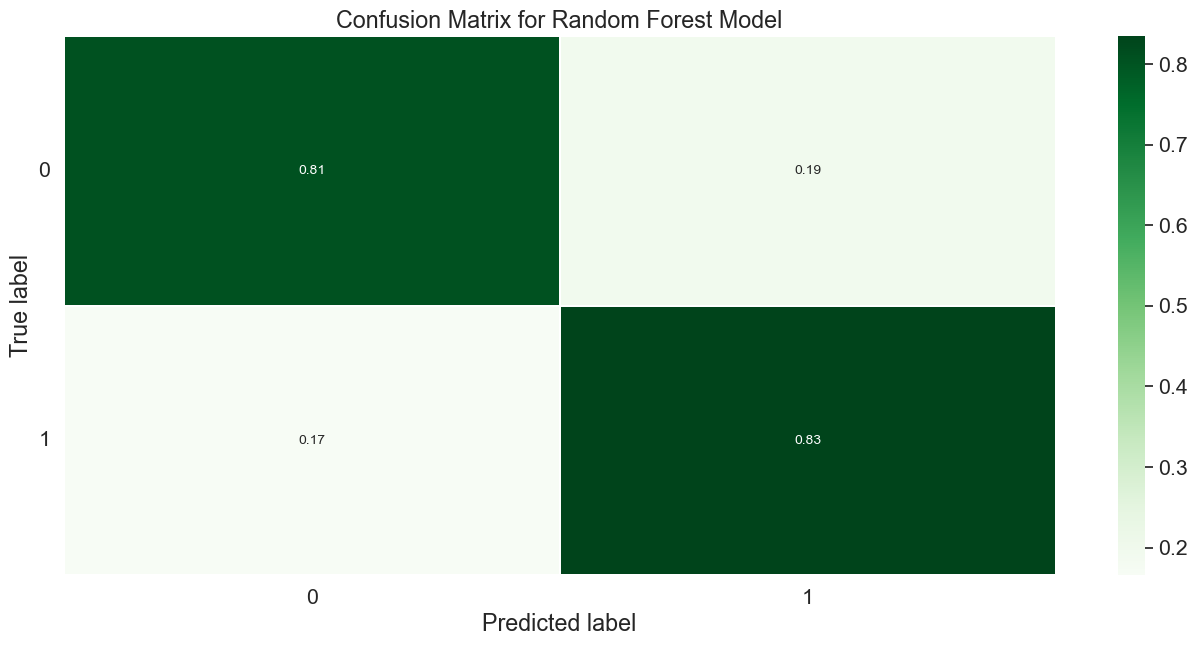

In [22]:
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

class_names = ['0', '1']
tick_marks = np.arange(len(class_names)) +0.5
tick_marks2 = tick_marks
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')